### Importing the Dependencies

In [3]:
import os 
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

### Data Curation

In [4]:
print(os.listdir('/Users/aniketanilpalse/Documents/New Dataset ')[:5])
print('')
print(len(os.listdir("/Users/aniketanilpalse/Documents/New Dataset ")))

['Adulsa', 'Alovera', 'Sugarcane', 'Gokarna', '.DS_Store']

23


#### Number of Classes = 22

In [5]:
print(len(os.listdir('/Users/aniketanilpalse/Documents/New Dataset /Bramhi')))
print(os.listdir('/Users/aniketanilpalse/Documents/New Dataset /Bramhi')[0:5])

500
['Image_187.JPG', '20241023_164235.jpg', 'Image_144.JPG', 'IMG_20241023_163653654.jpg', 'IMG_20241023_163611842.jpg']


### Data Preprocessing

In [6]:
# Dataset Path
base_dir = '/Users/aniketanilpalse/Documents/New Dataset '

(1706, 1720, 3)


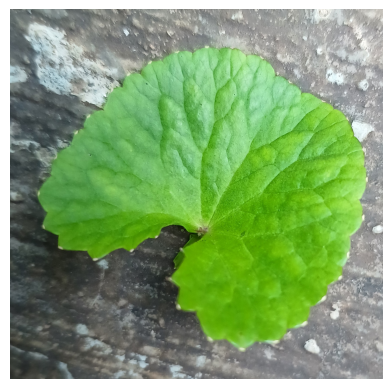

In [7]:
image_path = '/Users/aniketanilpalse/Documents/New Dataset /Bramhi/20241023_164024.jpg'

# Read the Image
img = mpimg.imread(image_path)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')   # Turn off axis numbers.
plt.show()

In [8]:
# Image with numberic values in array form.
img = mpimg.imread(image_path)
print(img)

[[[102 111 108]
  [105 114 111]
  [106 112 110]
  ...
  [195 192 185]
  [192 189 182]
  [190 187 180]]

 [[106 115 112]
  [105 114 111]
  [105 111 109]
  ...
  [189 186 179]
  [192 189 182]
  [194 191 184]]

 [[104 113 110]
  [104 113 110]
  [105 111 109]
  ...
  [193 190 183]
  [197 194 187]
  [197 194 187]]

 ...

 [[ 49  53  52]
  [ 49  53  52]
  [ 50  54  53]
  ...
  [150 151 153]
  [151 152 156]
  [152 153 157]]

 [[ 50  54  53]
  [ 51  55  54]
  [ 47  51  50]
  ...
  [154 155 159]
  [152 153 157]
  [150 151 155]]

 [[ 50  54  53]
  [ 51  55  54]
  [ 47  51  50]
  ...
  [154 155 159]
  [153 154 158]
  [151 152 156]]]


### Resizing Images

In [9]:
os.mkdir('/Users/aniketanilpalse/Documents/Image Resized')

In [10]:
original_folder = '/Users/aniketanilpalse/Documents/New Dataset '
resized_folder = '/Users/aniketanilpalse/Documents/Image Resized'

# Loop through each subfolder
for subdir, dirs, files in os.walk(original_folder):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Process only image files
            img_path = os.path.join(subdir, file)
            
            # Open and resize the image
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')
            
            # Create a new subfolder structure in resized_folder
            relative_path = os.path.relpath(subdir, original_folder)
            new_folder = os.path.join(resized_folder, relative_path)
            if not os.path.exists(new_folder):
                os.makedirs(new_folder)

            # Save resized image
            newImgPath = os.path.join(new_folder, file)
            img.save(newImgPath)
 
print("Resizing completed.")


/opt/anaconda3/envs/tf/lib/python3.12/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Resizing completed.


### Data Augmentation

In [11]:
# Path to resized images folder
resized_folder = '/Users/aniketanilpalse/Documents/Image resized'

# Define the image size
img_size = (224, 224)

# Create an ImageDataGenerator with useful transformations for plant identification
data_gen = ImageDataGenerator(
    rotation_range=20,                # Rotate the image by up to 20 degrees
    zoom_range=0.15,                  # Zoom in/out by 15%
    brightness_range=[0.8, 1.2],      # Adjust brightness by a factor between 0.8 (darker) and 1.2 (brighter)
    rescale=1./255,                   # Rescale pixel values to [0, 1]
)


# Loop through each class subfolder and augment the images
for class_folder in os.listdir(resized_folder):
    class_path = os.path.join(resized_folder, class_folder)
    
    if not os.path.isdir(class_path):
        continue  # Skip if it's not a folder
    
    # Loop through each image in the class folder
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        
        if img_path.endswith('.jpg') or img_path.endswith('.jpeg') or img_path.endswith('.png'):
            # Load the image
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)  # Convert image to array
            img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
            
            # Create an iterator to generate augmented images
            aug_iter = data_gen.flow(img_array, batch_size=1, save_to_dir=class_path, 
                                     save_prefix='aug', save_format='jpg')
            
            # Generate and save 5 augmented images per original image
            for i in range(5):
                aug_iter.__next__()  # Use __next__() instead of next()

print("Data augmentation completed and saved to respective folders.")


Data augmentation completed and saved to respective folders.
